In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from model import Net

import tensorflow.keras as K
import tensorflow.keras.optimizers.schedules as optimizers
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, auc, roc_auc_score

import os
import time

import sys
sys.path.append('..')
from data import train_gen, val_gen, test_gen, df_train, df_val, df_test, test_df, submit_test_gen

Found 7540 validated image filenames.
Found 2514 validated image filenames.
Found 2514 validated image filenames.
Found 5506 validated image filenames.


In [3]:
# load the model structure
model=Net()

# make every layer trainable
def set_trainable(model):
    for layer in model.layers:
        layer.trainable=True
    return
set_trainable(model)

# set the initializers to be Kaiming initializers (He initialers)
def set_initializer(model):
    for layer in model.layers:
        if layer.__class__.__name__=='Conv2D' or layer.__class__.__name__=='Dense':
            layer.kernel_initializer=K.initializers.he_normal(seed=None)
    return
set_initializer(model)

# take a look what the model like
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [5]:
epochs=500

BATCH_SIZE=32

compute_steps_per_epoch=lambda x: int(np.ceil(1.*x/BATCH_SIZE))

# Training

In [3]:
today=time.strftime('%Y%m%d')
if not os.path.exists(today):
    os.mkdir(today)

In [5]:

steps_per_epoch=compute_steps_per_epoch(df_train.shape[0]) # number of steps in training / epoch
validation_steps=compute_steps_per_epoch(df_val.shape[0]) # number of steps in validation / epoch

es=EarlyStopping(monitor='val_loss',mode='min',verbose=2,patience=60)
reduce_lr=optimizers.CosineDecayRestarts(
        initial_learning_rate=0.0005,first_decay_steps=10)
# reduce_lr=ReduceLROnPlateau(
#     monitor='val_loss',patience=15,verbose=1,min_lr=1e-6)

prefix=today+'/'
mc=ModelCheckpoint(prefix+'best_model.h5',monitor='val_accuracy',
                   verbose=1,save_best_only=True,
                   save_weights_only=False,
                   model='auto'
                  )

In [6]:
history=model.fit(train_gen,
                  steps_per_epoch=steps_per_epoch,
                  validation_data=val_gen,
                  validation_steps=validation_steps,
                  epochs=epochs,
                  callbacks=[mc,es,LearningRateScheduler(reduce_lr)]
                 )

Epoch 1/500
236/236 [==============================] - 125s 416ms/step - loss: 0.5308 - accuracy: 0.7694 - val_loss: 0.4123 - val_accuracy: 0.8007

Epoch 00001: val_accuracy improved from -inf to 0.80072, saving model to 20210923\best_model.h5
Epoch 2/500
236/236 [==============================] - 94s 397ms/step - loss: 0.3692 - accuracy: 0.8431 - val_loss: 0.5749 - val_accuracy: 0.7562

Epoch 00002: val_accuracy did not improve from 0.80072
Epoch 3/500
236/236 [==============================] - 93s 394ms/step - loss: 0.2948 - accuracy: 0.8777 - val_loss: 0.5418 - val_accuracy: 0.7550

Epoch 00003: val_accuracy did not improve from 0.80072
Epoch 4/500
236/236 [==============================] - 93s 393ms/step - loss: 0.2757 - accuracy: 0.8886 - val_loss: 0.3326 - val_accuracy: 0.8576

Epoch 00004: val_accuracy improved from 0.80072 to 0.85760, saving model to 20210923\best_model.h5
Epoch 5/500
236/236 [==============================] - 92s 390ms/step - loss: 0.2242 - accuracy: 0.9078 - 

236/236 [==============================] - 92s 391ms/step - loss: 0.1346 - accuracy: 0.9459 - val_loss: 0.2346 - val_accuracy: 0.9149

Epoch 00040: val_accuracy did not improve from 0.94630
Epoch 41/500
236/236 [==============================] - 93s 392ms/step - loss: 0.1270 - accuracy: 0.9504 - val_loss: 4.5242 - val_accuracy: 0.5461

Epoch 00041: val_accuracy did not improve from 0.94630
Epoch 42/500
236/236 [==============================] - 92s 391ms/step - loss: 0.1282 - accuracy: 0.9495 - val_loss: 0.2814 - val_accuracy: 0.8938

Epoch 00042: val_accuracy did not improve from 0.94630
Epoch 43/500
236/236 [==============================] - 93s 391ms/step - loss: 0.1193 - accuracy: 0.9513 - val_loss: 1.0119 - val_accuracy: 0.7438

Epoch 00043: val_accuracy did not improve from 0.94630
Epoch 44/500
236/236 [==============================] - 92s 390ms/step - loss: 0.1055 - accuracy: 0.9597 - val_loss: 0.2654 - val_accuracy: 0.9002

Epoch 00044: val_accuracy did not improve from 0.9463

236/236 [==============================] - 92s 391ms/step - loss: 0.0902 - accuracy: 0.9659 - val_loss: 0.2418 - val_accuracy: 0.9161

Epoch 00080: val_accuracy did not improve from 0.95386
Epoch 81/500
236/236 [==============================] - 93s 391ms/step - loss: 0.0825 - accuracy: 0.9672 - val_loss: 0.9811 - val_accuracy: 0.7812

Epoch 00081: val_accuracy did not improve from 0.95386
Epoch 82/500
236/236 [==============================] - 92s 391ms/step - loss: 0.0935 - accuracy: 0.9630 - val_loss: 0.2630 - val_accuracy: 0.9260

Epoch 00082: val_accuracy did not improve from 0.95386
Epoch 83/500
236/236 [==============================] - 92s 390ms/step - loss: 0.0828 - accuracy: 0.9678 - val_loss: 0.2113 - val_accuracy: 0.9264

Epoch 00083: val_accuracy did not improve from 0.95386
Epoch 00083: early stopping


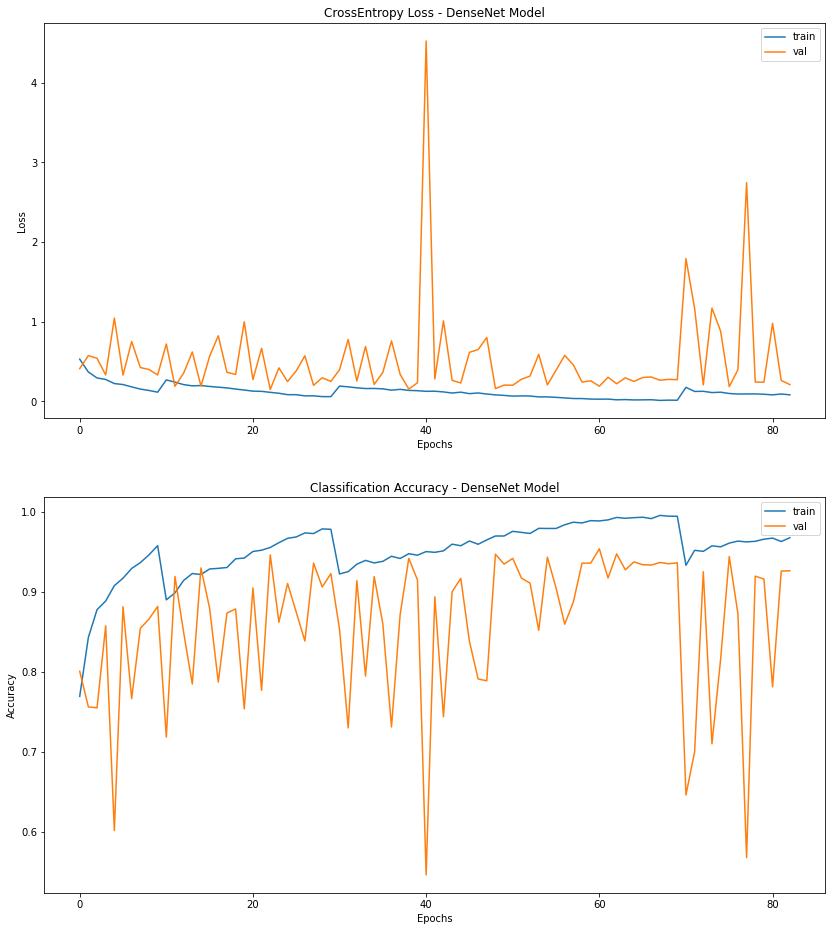

In [7]:
def history_plot(model_id,history):
    plt.figure(figsize=[14,16])
    
    # plot loss
    plt.subplot(2,1,1)
    
    plt.plot(history.history['loss'],label='train')
    plt.plot(history.history['val_loss'],label='val')
    
    plt.legend()
    
    plt.title('CrossEntropy Loss - '+model_id)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    
    # plot accuracy
    plt.subplot(2,1,2)
    
    plt.plot(history.history['accuracy'],label='train')
    plt.plot(history.history['val_accuracy'],label='val')
    
    plt.legend()
    
    plt.title('Classification Accuracy - '+model_id)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    
    plt.show()
    
history.history.keys()

history_plot('DenseNet Model',history)

# Make Predictions on the set with known labels for evaluations

In [6]:
# Save results as CSV files

prefix='20210923'+'/'

model.load_weights(prefix+'best_model.h5')

category_names=['No Defect','Defect']

y_test=df_test['defect_label']

STEP_SIZE_TEST=compute_steps_per_epoch(y_test.shape[0])


predictions=model.predict(test_gen,steps=STEP_SIZE_TEST,verbose=1)

y_pred=(predictions>0.5).astype('int32')

79/79 [==============================] - 14s 76ms/step


In [7]:
# Evalutions
# ------------

# (I) classification report

report_string=classification_report(y_test,y_pred,target_names=category_names)
print(report_string)

              precision    recall  f1-score   support

   No Defect       0.94      0.94      0.94      1181
      Defect       0.95      0.95      0.95      1333

    accuracy                           0.95      2514
   macro avg       0.95      0.95      0.95      2514
weighted avg       0.95      0.95      0.95      2514



ROC AUC=0.988


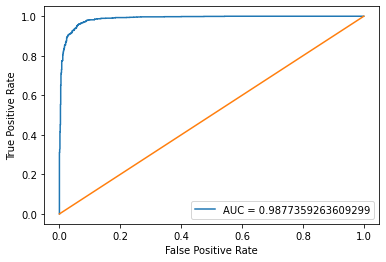

In [8]:
# (II) AUC

# calculate scores
auc=roc_auc_score(y_test,predictions)

#summarize scores
print('ROC AUC=%.3f' % auc)

ns_fpr, ns_tpr, _= roc_curve(y_test,predictions)
# fpr='false positive rate'
# tpr='true positive rate'

# plot the roc curve for the model
plt.plot(ns_fpr,ns_tpr,label='AUC = '+str(auc))
plt.plot([0,1],[0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

# If satisfied, make prediction on the real test set to determine whether images there contain defects 

In [9]:
# save the satifised model
model.save('CNNDenseNet2classes.h5',save_format='h5')

In [10]:
STEP_SIZE_TEST=compute_steps_per_epoch(test_df.shape[0])

# make prediction
submit_test=model.predict(submit_test_gen,
                          steps=STEP_SIZE_TEST,
                          verbose=1
                         )

test_df['defect_label']=(submit_test>0.5).astype('int32')

test_df.head()

173/173 [==============================] - 30s 165ms/step


,ImageId,defect_label
0,0000f269f.jpg,0
1,000ccc2ac.jpg,1
2,002451917.jpg,1
3,003c5da97.jpg,1
4,0042e163f.jpg,1


In [11]:
# see the statistics of the test predictions
test_df['defect_label'].value_counts()


1    2836
0    2670
Name: defect_label, dtype: int64

In [13]:
# save the test results to csv file

# pd.DataFrame(history.history).to_csv(
#     'CNN_DenseNet_history.csv',index=False)

# train_df.to_csv('train_binClass_DenseNet.csv',index=False)
test_df.to_csv('test_binClass_DenseNet.csv',index=False)